# Atividade das cidades do Brasil visando IDH

Cenário:

Um gestor público solicitou a uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. O objetivo é estudar características e propor políticas adequadas nas áreas de Educação, Saúde e aumento de Renda. Para auxiliar nesse estudo, utilize a base de dados `cidades_do_brasil.xlsx`  e responda às seguintes perguntas:

# 0.0 Importações

## 0.1 Importação das libs

In [120]:
#calculo
import numpy as np

#manipulação de dados
import pandas as pd

#visualizacao dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#utilidades
import inflection

## 0.2 Importação dos dados

In [14]:
df_raw = pd.read_excel("cidades_do_brasil.xlsx")
df_raw.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1


# 1.0 Descrição e ajustes dos dados

In [24]:
df1 = df_raw.copy()

## 1.1 Ajuste das colunas

In [26]:
cols_old = df1.columns

#trocar as palavras para snakecase onde elas são separadas por underlines
snakecase = lambda x: inflection.underscore( x )

cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new
df1.columns

Index(['município', 'estado', 'ibge_1_4', 'idhm', 'idhm_renda',
       'idhm_educacao', 'gdp_capita', 'comp_p', 'valor vazio'],
      dtype='object')

## 1.2 Dimensões dos dados

In [34]:
print(f"linhas: {df1.shape[0]}")
print(f"colunas: {df1.shape[1]}")

linhas: 5576
colunas: 9


## 1.3 Checagem de NAs

In [41]:
df1.isna().sum()

município        0
estado           0
ibge_1_4         8
idhm             8
idhm_renda       8
idhm_educacao    8
gdp_capita       3
comp_p           3
valor vazio      0
dtype: int64

In [43]:
df1.dropna(axis=0, inplace=True)
df1.isna().sum()

município        0
estado           0
ibge_1_4         0
idhm             0
idhm_renda       0
idhm_educacao    0
gdp_capita       0
comp_p           0
valor vazio      0
dtype: int64

## 1.4 Descrição dos dados

In [48]:
df1.describe()

,ibge_1_4,idhm,idhm_renda,idhm_educacao,gdp_capita,comp_p,valor vazio
count,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.0
mean,1545.113526,0.659236,0.642935,0.559154,21125.217676,30.993893,0.0
std,9251.500532,0.071971,0.080665,0.093350,20314.102511,261.076631,0.0
min,5.000000,0.418000,0.400000,0.207000,3190.570000,0.000000,0.0
25%,158.000000,0.599000,0.572000,0.490000,9063.325000,2.000000,0.0
50%,377.000000,0.665000,0.654000,0.560000,15879.960000,6.000000,0.0
75%,952.000000,0.718000,0.707000,0.631000,26160.055000,17.000000,0.0
max,514794.000000,0.862000,0.891000,0.825000,314637.690000,16030.000000,0.0


<Axes: xlabel='idhm', ylabel='Count'>

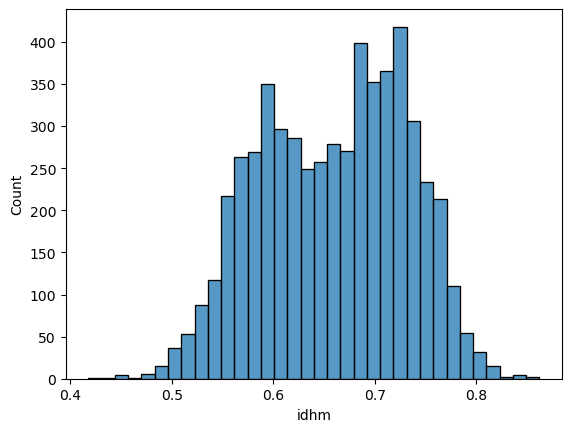

In [55]:
sns.histplot(df1["idhm"])

# 2.0 Feature engeneering

## 2.1 Mapeamento das regiões

In [63]:
estados_por_regiao = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

In [74]:
def mapear_regiao(sigla):
    for regiao, estados in estados_por_regiao.items():
        if sigla.upper() in estados:
            return regiao
    return "Sigla inválida"

In [76]:
df1["regiao"] = df1["estado"].apply(lambda x: mapear_regiao(x))

In [78]:
df1.head()

,município,estado,ibge_1_4,idhm,idhm_renda,idhm_educacao,gdp_capita,comp_p,valor vazio,regiao
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0,Sudeste
10,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,0,Sudeste
11,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0,0,Sudeste
12,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0,0,Centro-Oeste
13,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0,0,Sul


## 2.2 mapeamento do idh segundo classificacao da ONU

In [114]:
def classificar_idh(idh):
    if idh <= 0.550:
        return "baixo"
    elif idh <= 0.699:
        return "medio"
    elif idh <= 0.799:
        return "alto"
    else:
        return "muito alto"

In [116]:
df1["situacao"] = df1["idhm"].apply(lambda x: classificar_idh(x))

In [118]:
df1.head()

,município,estado,ibge_1_4,idhm,idhm_renda,idhm_educacao,gdp_capita,comp_p,valor vazio,regiao,situacao
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0,Sudeste,muito alto
10,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,0,Sudeste,alto
11,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0,0,Sudeste,alto
12,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0,0,Centro-Oeste,muito alto
13,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0,0,Sul,muito alto


# 3.0 Ánalise dos dados visando as questões de sala

a) Quartil Inferior:
- Qual o valor que separa os 25% dos municípios com os menores IDHM? Utilize o conceito de quartis.

In [105]:
quartil1 = df1['idhm'].quantile(0.25)
print(f"Quartil que sepada as cidades por idh {quartil1}")
separacao = df1["idhm"] < quartil1
print(f"quantidade de cidades abaixo do 25% de idh: {len(df1.loc[separacao, :]['município'].tolist())}")

Quartil que sepada as cidades por idh 0.599
quantidade de cidades abaixo do 25% de idh: 1367


b) Concentração Geográfica:
- Considerando os municípios com menor IDHM, existe uma concentração em algum estado ou distrito? Utilize o conceito de Pareto para fundamentar sua resposta.

<Axes: ylabel='estado'>

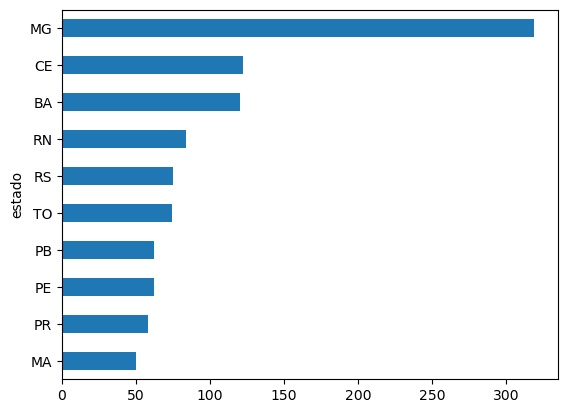

In [156]:
q1 = df1["idhm"].quantile(0.25)
q2 = df1["idhm"].median()

intervalo = (df1["idhm"] > q1) & (df1["idhm"] < q2)
cidades = df1.loc[intervalo, :]
frequencia = cidades["estado"].value_counts()[:10].sort_values()
frequencia.plot(kind="barh")

- A ONU classifica o IDH em quatro faixas:
  - Baixo: < 0,550
  - Médio: 0,550 - 0,699
  - Alto: 0,700 - 0,799
  - Muito Alto: >= 0,800
  - Pergunta: Com base nessa classificação, analise a situação atual do Brasil e de cada região.

<Axes: xlabel='situacao'>

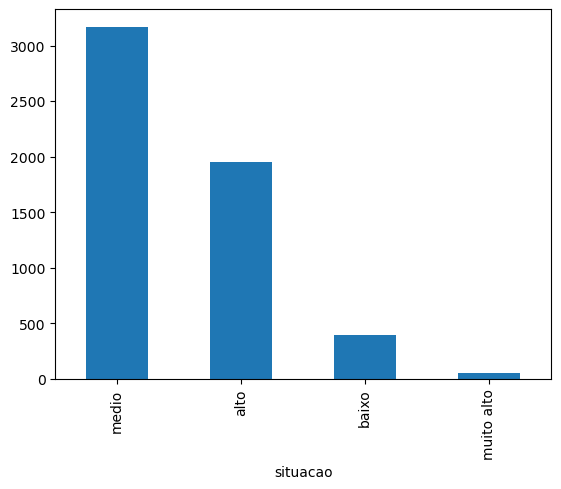

In [132]:
frequencia = df1["situacao"].value_counts()
frequencia.plot(kind = "bar")

<Axes: xlabel='regiao'>

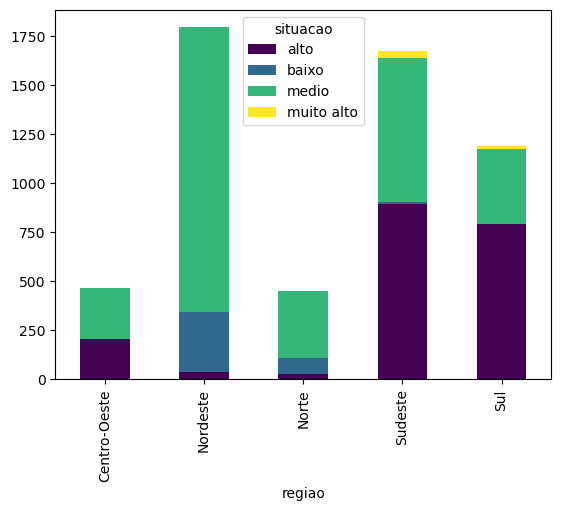

In [126]:
contagem = pd.crosstab(df1["regiao"], df1["situacao"])
contagem.plot(kind="bar", stacked=True, colormap="viridis")

## Educacao infantil

d) Boxplot por Região:
- Construa um boxplot da variável IDHM_Educacao por região (NO, NE, SE, S e CO). Comente as semelhanças e diferenças entre os gráficos.

<Axes: xlabel='regiao', ylabel='idhm_educacao'>

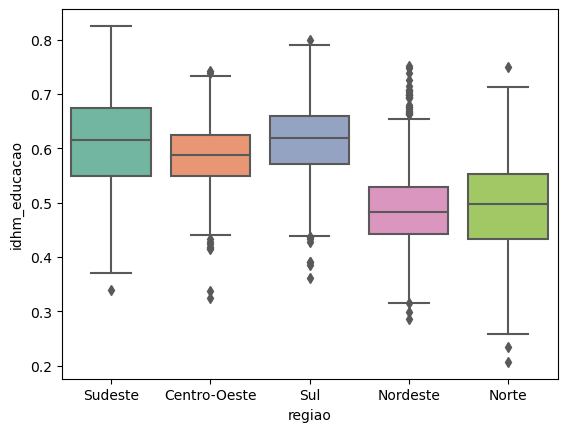

In [166]:
sns.boxplot(x="regiao", y="idhm_educacao", data=df1, palette="Set2")

e) Municípios com Mais Crianças:  
- Na região com a menor média de IDHM_Educacao, identifique os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).

In [179]:
aux1 = df1[["regiao", "idhm_educacao"]].groupby("regiao").mean()
aux1.sort_values(by="idhm_educacao")

,idhm_educacao
regiao,
Nordeste,0.488436
Norte,0.490428
Centro-Oeste,0.584142
Sudeste,0.608254
Sul,0.612991


In [221]:
regiao = df1["regiao"] == "Nordeste"
aux1 = df1.loc[regiao, :]
quartil3 = aux1['ibge_1_4'].quantile(0.75)
print(f"Quartil que sepada as cidades por quantidade de criancas {quartil3}")
separacao = aux1["ibge_1_4"] > quartil3
print(f"quantidade de cidades abaixo do 75% de quantidade de criancas: {len(aux1.loc[separacao, :]['município'].tolist())}")

Quartil que sepada as cidades por quantidade de criancas 962.0
quantidade de cidades abaixo do 75% de quantidade de criancas: 448


In [194]:
print(aux1.loc[separacao, :]['município'].tolist()[:20])

['Condeúba', 'Parambu', 'Paramirim', 'Boquira', 'Caculé', 'Rio Do Pires', 'Monte Santo', 'Souto Soares', 'Piatã', 'Varjota', 'Cansanção', 'Tabuleiro Do Norte', 'Belém', 'Frecheirinha', 'Ituaçu', 'Muritiba', 'Cachoeira', 'Ibiapina', 'Ibicoara', 'Fernando De Noronha']


f) Empresas de Educação:
- Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

g) Prioridade de Investimento: 
- Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.

In [219]:
q1 = df1['comp_p'].quantile(0.25)
separacao = df1["comp_p"] < q1
df_separado = df1[separacao]
df_ordenado = df1[separacao].sort_values(by="comp_p").head(10)
df_ordenado["município"].tolist()

['Condeúba',
 'Mirante',
 'Rio Bom',
 'Lajedão',
 'Lajeado',
 'Cedral',
 'Montauri',
 'Itaguatins',
 'Pedranópolis',
 'Barro Preto']